In [0]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, _),(x_test, _) = cifar10.load_data()
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("train sample:",x_train.shape[0])

170500096/170498071 [==============================] - 2s 0us/step
x_train shape (50000, 32, 32, 3)
x_test shape (10000, 32, 32, 3)
train sample: 50000


In [0]:
x_train = x_train[:, :, :, 0]
x_test = x_test[:, :, :, 0]

In [0]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("train sample:",x_train.shape[0])

x_train shape (50000, 32, 32)
x_test shape (10000, 32, 32)
train sample: 50000


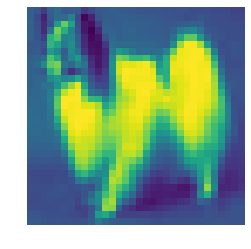

In [0]:
plt.imshow(x_train[4000])
plt.axis("off")
plt.show()

In [0]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
print("x_train shape",x_train.shape)
print("train sample:",x_train.shape[0])

4423680/4422102 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
train sample: 60000


In [0]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [0]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

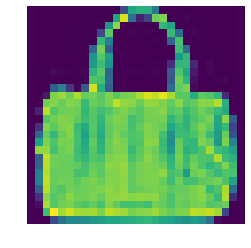

In [0]:
plt.imshow(x_train[4000].reshape(28,28))
plt.axis("off")
plt.show()

In [0]:
input_img = Input(shape = (784,))

encoded = Dense(392, activation="relu")(input_img)

encoded = Dense(196, activation="relu")(encoded)

encoded = Dense(98, activation="relu")(encoded)

encoded = Dense(49, activation="relu")(encoded)

encoded = Dense(24, activation="relu")(encoded)

decoded = Dense(12, activation="relu")(encoded)

decoded = Dense(24, activation="relu")(encoded)

decoded = Dense(49, activation="relu")(encoded)

decoded = Dense(98, activation="relu")(encoded)

decoded = Dense(196, activation="relu")(encoded)

decoded = Dense(392, activation="relu")(encoded)

decoded = Dense(784, activation="sigmoid")(decoded)

W0829 07:09:44.426853 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 07:09:44.473733 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 07:09:44.483717 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
input_img = Input(shape = (1024,))

encoded = Dense(512, activation="relu")(input_img)

encoded = Dense(256, activation="relu")(encoded)

encoded = Dense(128, activation="relu")(encoded)

encoded = Dense(64, activation="relu")(encoded)

encoded = Dense(32, activation="relu")(encoded)

decoded = Dense(16, activation="relu")(encoded)

decoded = Dense(32, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)

decoded = Dense(128, activation="relu")(encoded)

decoded = Dense(256, activation="relu")(encoded)

decoded = Dense(512, activation="relu")(encoded)

decoded = Dense(1024, activation="sigmoid")(decoded)

W0828 16:41:01.786832 140299752003456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 16:41:01.826538 140299752003456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 16:41:01.834825 140299752003456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
autoencoder = Model(input_img,decoded)

autoencoder.compile(optimizer="adam",loss="binary_crossentropy")

W0829 07:09:49.449786 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 07:09:49.482994 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0829 07:09:49.489573 140222257694592 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
hist = autoencoder.fit(x_train,
                       x_train,
                       epochs=200,
                       batch_size=250,
                       shuffle=True,
                       validation_data = (x_train,x_train))

W0829 07:09:53.583278 140222257694592 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 14s 238us/step - loss: 0.3583 - val_loss: 0.3120
Epoch 2/200
60000/60000 [==============================] - 13s 218us/step - loss: 0.3040 - val_loss: 0.2981
Epoch 3/200
60000/60000 [==============================] - 13s 218us/step - loss: 0.2954 - val_loss: 0.2921
Epoch 4/200
60000/60000 [==============================] - 13s 217us/step - loss: 0.2911 - val_loss: 0.2893
Epoch 5/200
60000/60000 [==============================] - 13s 218us/step - loss: 0.2884 - val_loss: 0.2863
Epoch 6/200
60000/60000 [==============================] - 13s 219us/step - loss: 0.2863 - val_loss: 0.2846
Epoch 7/200
60000/60000 [==============================] - 13s 218us/step - loss: 0.2843 - val_loss: 0.2830
Epoch 8/200
60000/60000 [==============================] - 13s 220us/step - loss: 0.2831 - val_loss: 0.2823
Epoch 9/200
60000/60000 [==============================] - 13s 219us/step - loss: 0.28

In [0]:
autoencoder.save_weights("autoencoder_model.h5")

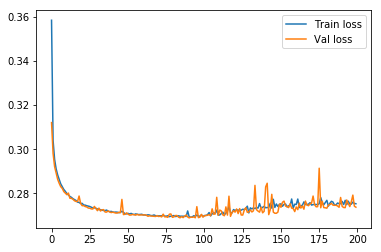

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(hist.history["loss"],label = "Train loss")
plt.plot(hist.history["val_loss"],label = "Val loss")

plt.legend()
plt.show()
plt.savefig('autoencoder_model_cifar10.png')

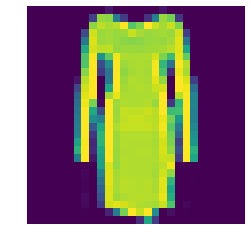

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [15]:
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)

plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(encoded_img[1500].reshape(24,24))
plt.axis("off")
plt.show()

In [0]:
decoded_imgs = autoencoder.predict(x_test)

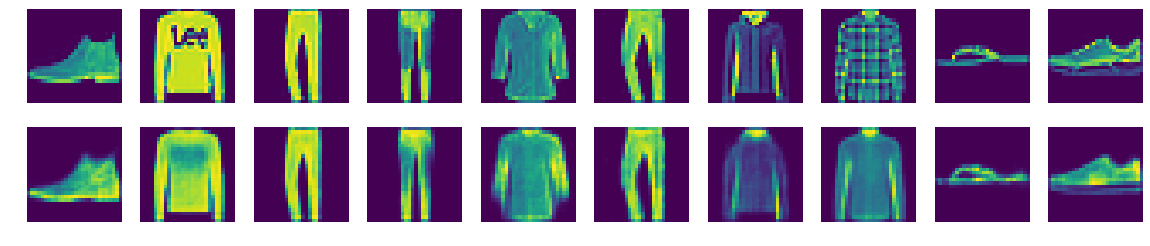

In [18]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.axis("off")

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.axis("off")
plt.show()
